### Integrantes del grupo
*   Jose Fernando Motta Mendez
*   Miguel Diaz
*   Emily Tench

## Objetivo del Proyecto

El objetivo de este proyecto es analizar el comportamiento de compra de los clientes a partir de sus caracter√≠sticas demogr√°ficas y sus patrones de consumo. A trav√©s del an√°lisis de datos de ventas, buscamos responder las siguientes preguntas clave:

- ¬øC√≥mo influyen la edad y el g√©nero del cliente en su comportamiento de compra?
- ¬øExisten patrones discernibles en las ventas a lo largo de distintos per√≠odos de tiempo?
- ¬øCu√°les son las categor√≠as de productos que generan mayor inter√©s entre los clientes?
- ¬øQu√© relaci√≥n existe entre la edad, el gasto y las preferencias de productos?
- ¬øC√≥mo se adaptan los h√°bitos de compra de los clientes durante las tendencias estacionales?
- ¬øSe pueden identificar comportamientos de compra distintos seg√∫n la cantidad de art√≠culos por transacci√≥n?
- ¬øQu√© informaci√≥n se puede extraer de la distribuci√≥n de precios de productos dentro de cada categor√≠a?

Este an√°lisis permitir√° obtener una visi√≥n integral sobre los h√°bitos de compra, identificar tendencias clave y proporcionar recomendaciones estrat√©gicas para mejorar la toma de decisiones empresariales.


In [69]:
# Se define el path donde se encuentran los archivos con los datos a partir de los que se entrena el modelo
from google.colab import drive
drive.mount('/content/drive')

datos_sales = '/content/drive/MyDrive/Colab Notebooks/Proyecto_integrador_ML/Data_para_entrenar_modelo/retail_sales_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Se importan las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
# Se carga la data a Pandas
datos_sales = pd.read_csv(datos_sales)

### EDA
Luego de haber cargado la data se procede a hacer un analisis exploratorio de datos con el fin de ver que tipo de informacion contiene el dataset, el tipo de variables, cantidad de datos nulos, etc.

In [72]:
# Visualizacion de las primera 5 filas
print(datos_sales.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [73]:
# Visualizacion del tipo de variable
print(datos_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [74]:
# Descripcion estadistica
print(datos_sales.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [75]:
# Identificacion de datos nulos
datos_nulos = datos_sales.isnull().sum()
print(f"La cantidad de datos nulos por cada variable es:\n {datos_nulos}")

La cantidad de datos nulos por cada variable es:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### EDA
Luego de haber observado el tipo de variables que tiene el dataset, se procede a realizar un encoding de las variables categoricas. Para esto primero se extraen los valores unicos, y posteriormente a cada categoria se le asigna un numero

In [76]:
# Datos unicos de la variable Gender

print(datos_sales['Gender'].unique())

['Male' 'Female']


### Asignacion de numeros a las categorias
A Male se le asigna 0
A Female se le asigna 1

In [77]:
# Encoding
datos_sales['Gender'] = datos_sales['Gender'].replace({'Male': 0, 'Female': 1})


<ipython-input-77-d19958c1970f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_sales['Gender'] = datos_sales['Gender'].replace({'Male': 0, 'Female': 1})


In [78]:
# Datos unicos de la variable Product Category
print(datos_sales['Product Category'].unique())

['Beauty' 'Clothing' 'Electronics']


### Asginacion de numeros a las categorias
A Beauty se le asigna 0
A Clothing se le asigna 1
A Electronics se le asigna 2

In [79]:
# Encoding
datos_sales['Product Category'] = datos_sales['Product Category'].replace({'Beauty': 0, 'Clothing': 1, 'Electronics': 2})

<ipython-input-79-ce1a09fd282e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_sales['Product Category'] = datos_sales['Product Category'].replace({'Beauty': 0, 'Clothing': 1, 'Electronics': 2})


### Resultado encoding

Luego de haber realizado el encoding, se procede a imprimir los primeros 5 datos de cada columna para comprobar que el encoding haya funcionado

In [80]:
print(datos_sales.head())

   Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0               1  2023-11-24     CUST001       0   34                 0   
1               2  2023-02-27     CUST002       1   26                 1   
2               3  2023-01-13     CUST003       0   50                 2   
3               4  2023-05-21     CUST004       0   37                 1   
4               5  2023-05-06     CUST005       0   30                 0   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


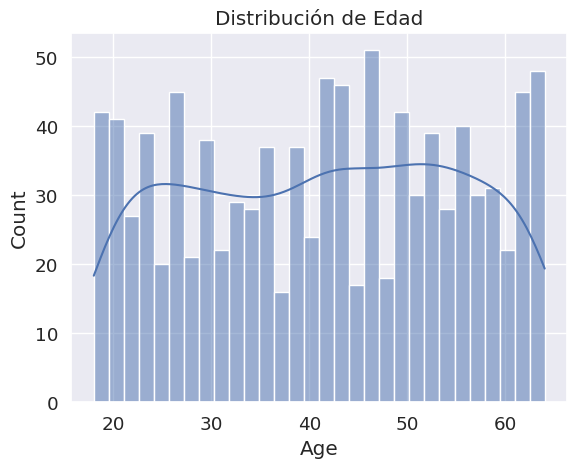

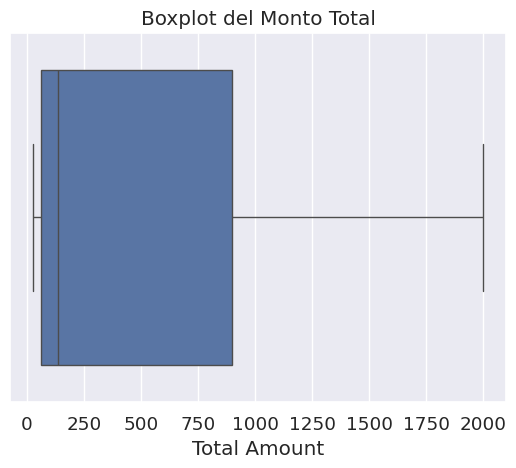

In [81]:
# Distribucion de la edad de los clientes
sns.histplot(datos_sales['Age'], bins=30, kde=True)
plt.title('Distribuci√≥n de Edad')
plt.show()

sns.boxplot(x=datos_sales['Total Amount'])
plt.title('Boxplot del Monto Total')
plt.show()

### Analisis de resultados


### EDA
Luego se procede a calcular el promedio de monto de la compra por genero, esto con el fin de identificar si el genero de la persona influencia la cantidad de plata que se gasta.

Asi mismo, se calcula la del monto total por categoria de producto.

In [82]:
# Calculo promedio
promedio_monto_total_por_genero = datos_sales.groupby('Gender')['Total Amount'].mean()
monto_total_por_categoria_producto = datos_sales.groupby('Product Category')['Total Amount'].sum()

print(f"El monto promedio por genero es: \n {promedio_monto_total_por_genero}")
print(f"La suma del monto total por categoria es: \n {monto_total_por_categoria_producto}")

El monto promedio por genero es: 
 Gender
0    455.428571
1    456.549020
Name: Total Amount, dtype: float64
La suma del monto total por categoria es: 
 Product Category
0    143515
1    155580
2    156905
Name: Total Amount, dtype: int64


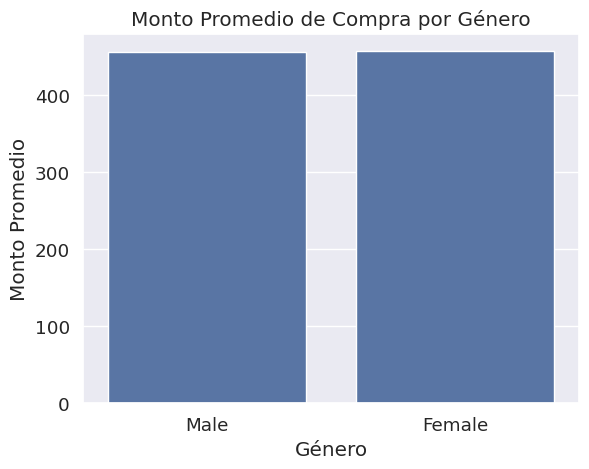

In [83]:
# Agrupar y calcular promedio
promedio_monto_total_por_genero = datos_sales.groupby('Gender')['Total Amount'].mean().reset_index()

# Mapear los valores de g√©nero
promedio_monto_total_por_genero['Gender'] = promedio_monto_total_por_genero['Gender'].map({0: 'Male', 1: 'Female'})

# Graficar
sns.barplot(x='Gender', y='Total Amount', data=promedio_monto_total_por_genero)
plt.title('Monto Promedio de Compra por G√©nero')
plt.ylabel('Monto Promedio')
plt.xlabel('G√©nero')
plt.show()


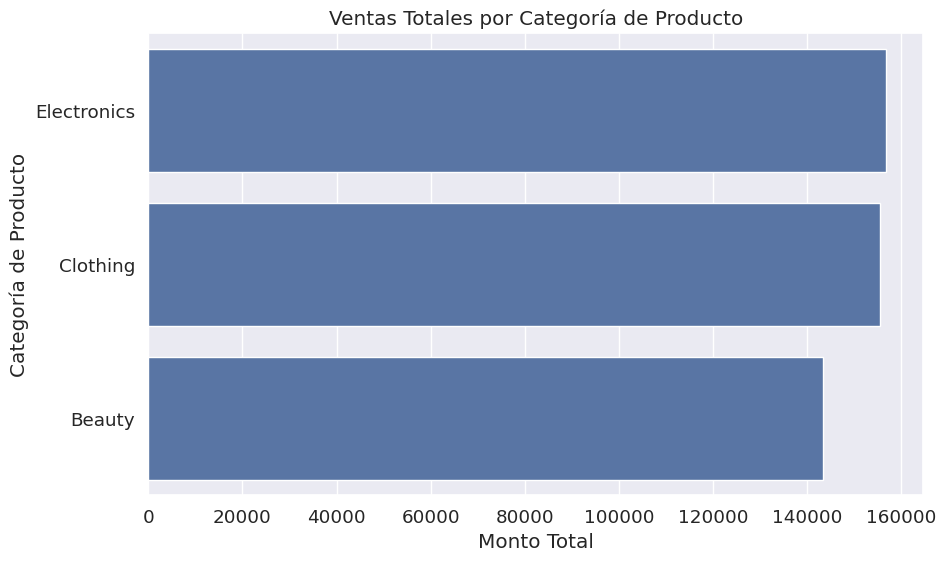

In [84]:
# Agrupar y sumar
monto_total_por_categoria_producto = datos_sales.groupby('Product Category')['Total Amount'].sum().reset_index()

# Mapear si las categor√≠as est√°n codificadas
category_labels = {
    0: 'Beauty',
    1: 'Clothing',
    2: 'Electronics'
}
monto_total_por_categoria_producto['Product Category'] = monto_total_por_categoria_producto['Product Category'].map(category_labels)

plt.figure(figsize=(10, 6))

# Ordenar y graficar
sns.barplot(
    x='Total Amount',
    y='Product Category',
    data=monto_total_por_categoria_producto.sort_values('Total Amount', ascending=False)
)
plt.title('Ventas Totales por Categor√≠a de Producto')
plt.xlabel('Monto Total')
plt.ylabel('Categor√≠a de Producto')
plt.show()



### Ventas por mes
Luego se procede a graficar las ventas por mes con el fin de identificar tendencias, por ejemplo si hay meses en donde haya festividades que incrementen las ventas

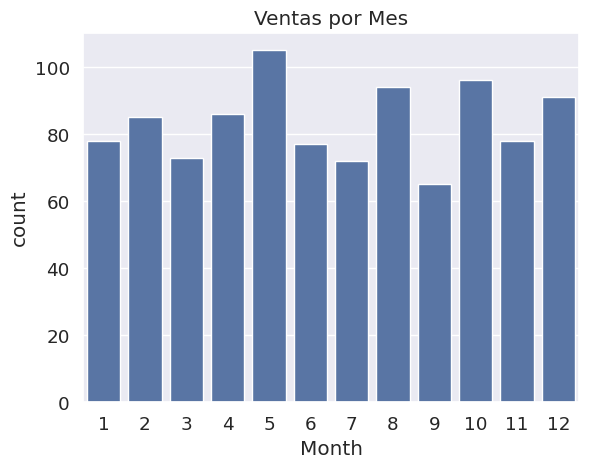

In [85]:
datos_sales['Date'] = pd.to_datetime(datos_sales['Date'])
datos_sales['Month'] = datos_sales['Date'].dt.month
datos_sales['Weekday'] = datos_sales['Date'].dt.day_name()

sns.countplot(x='Month', data=datos_sales)
plt.title('Ventas por Mes')
plt.show()

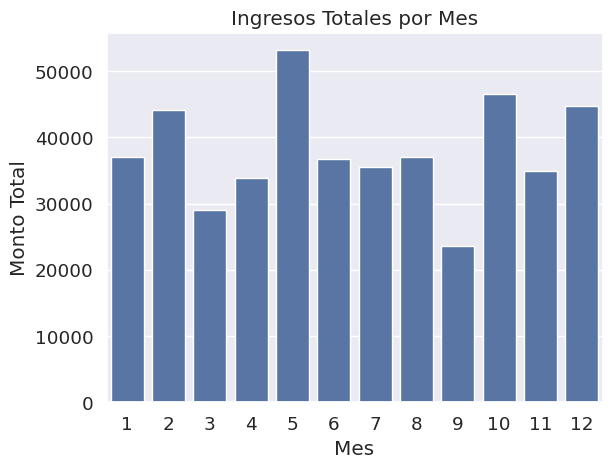

In [86]:
# Ventas por mes en $
ventas_mes = datos_sales.groupby('Month')['Total Amount'].sum().reset_index()

sns.barplot(x='Month', y='Total Amount', data=ventas_mes)
plt.title('Ingresos Totales por Mes')
plt.ylabel('Monto Total')
plt.xlabel('Mes')
plt.show()


### Formulacion de hipotesis

* El genero tiene gran influencia sobre la categoria de producto a comprar, se estima que el genero que mas gasta el productos de belleza (beauty) son las mujeres, seguido de ropa, mientras que los hombres tienden a gastar mas en productos de electronica.
* Las personas entre los 20-30 a√±os hacen parte del grupo de clientes que son sensibles a los precios, mientras que los clientes de 30 a√±os en adelante no le atribuyen tanta importancia al precio y pueden incluso comprar en bulk.
* La temporada del a√±o influye en la cantidad total de transacciones.

### Modelo de ML a usar
* Clustering --> este modelo sera util para segmentar la data y de esta manera hacer que las relaciones entre los features sean mas lineales
* Regresion lineal --> Luego de tener los clusteres se aplicara regresion lineal a cada cluster, lo cual permitira hacer predicciones de demanda mas precisas

In [87]:
# Se seleccionan las variables numericas
scaler = RobustScaler()
numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
datos_sales_numerical = datos_sales[numerical_features]
datos_sales_numerical = scaler.fit_transform(datos_sales_numerical)

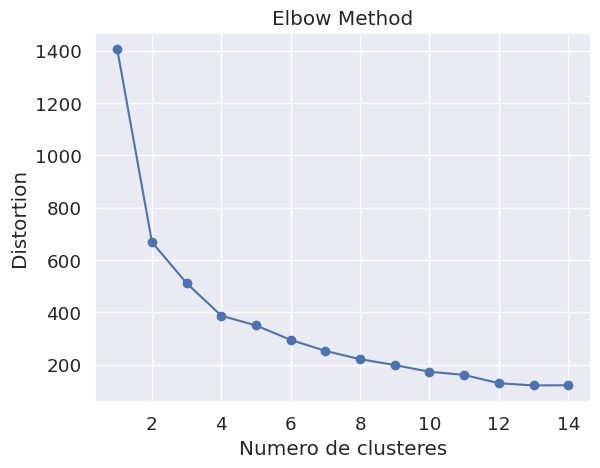

In [88]:
#Luego se determina el numero de clusteres
distortions = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(datos_sales_numerical)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Numero de clusteres')
plt.ylabel('Distortion')
plt.show()

In [89]:
# Kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
datos_sales['Cluster'] = kmeans.fit_predict(datos_sales_numerical)

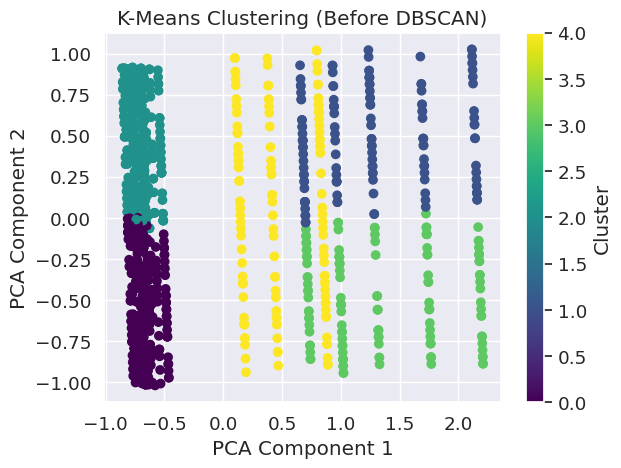

In [90]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(datos_sales_numerical)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=datos_sales['Cluster'], cmap='viridis')
plt.title("K-Means Clustering (Before DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [91]:
# Evaluacion clusteres
score = silhouette_score(datos_sales_numerical, datos_sales['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.36550955253825135


### Analisis de resultados

In [92]:
# Se implementa DBSCAN para ver si el resultado mejora
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust these values
datos_sales['DBSCAN_Cluster'] = dbscan.fit_predict(datos_sales_numerical)

# Evaluate the Silhouette Score
score_dbscan = silhouette_score(datos_sales_numerical, datos_sales['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {score_dbscan}")

DBSCAN Silhouette Score: 0.4806999244653411


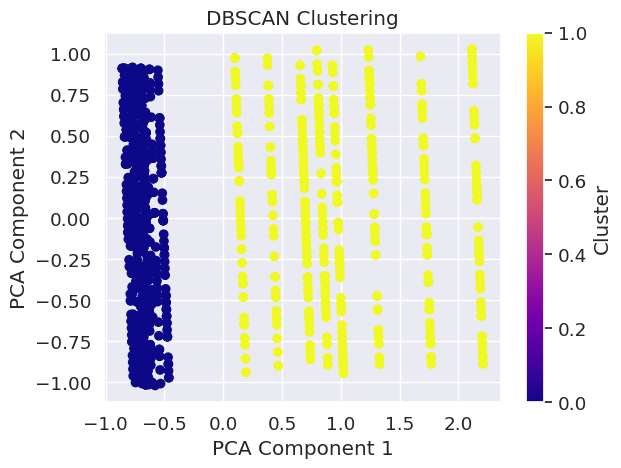

In [93]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=datos_sales['DBSCAN_Cluster'], cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [94]:
# Inspeccion de caracteristicas de los clusteres
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
cluster_summary = datos_sales.groupby('DBSCAN_Cluster')[numerical_columns].mean()
print(cluster_summary)


                      Age  Quantity  Price per Unit  Total Amount
DBSCAN_Cluster                                                   
0               41.844371  2.485099       35.248344     87.913907
1               40.702020  2.558081      400.505051   1017.424242


In [95]:
agg_clust = AgglomerativeClustering(n_clusters=5)
datos_sales['Agglomerative_Cluster'] = agg_clust.fit_predict(datos_sales_numerical)


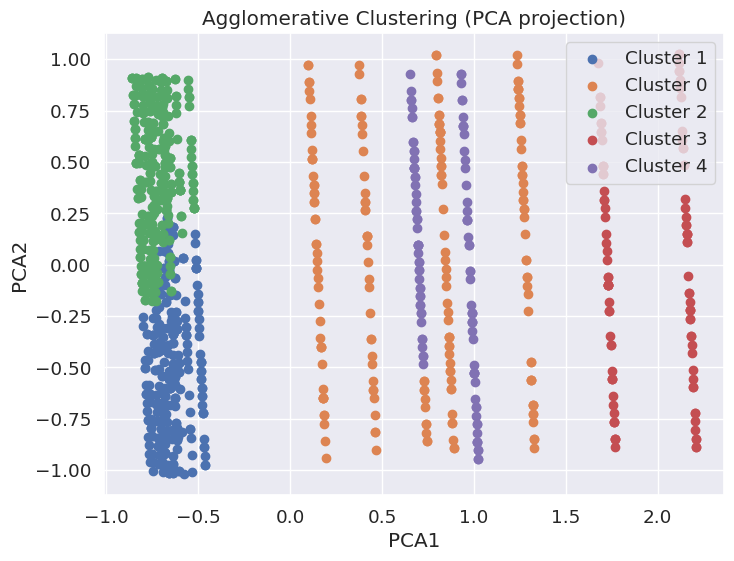

In [96]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_sales_numerical)

# Add PCA results to a temporary DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = datos_sales['Agglomerative_Cluster']

# Plot
plt.figure(figsize=(8,6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('Agglomerative Clustering (PCA projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# Se usa agglomerative clustering
score_agg = silhouette_score(datos_sales_numerical, datos_sales['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {score_agg}")

Agglomerative Clustering Silhouette Score: 0.3530842522593913


In [98]:
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
agg_cluster_summary = datos_sales.groupby('Agglomerative_Cluster')[numerical_columns].mean()
print(agg_cluster_summary)

                             Age  Quantity  Price per Unit  Total Amount
Agglomerative_Cluster                                                   
0                      41.036458  1.552083      404.166667    620.833333
1                      30.137931  2.724138       35.465517     96.344828
2                      52.656051  2.264331       35.047771     80.127389
3                      39.202020  3.494949      500.000000   1747.474747
4                      41.504762  3.514286      300.000000   1054.285714


# üìä Segmentaci√≥n de Clientes por Cl√∫ster

## Cl√∫ster 0 ‚Äì Minimalistas Premium
- **Edad promedio**: 41 a√±os  
- **Cantidad comprada**: baja (‚âà 1.5 unidades)  
- **Precio por unidad**: muy alto (~404)  
- **Monto total gastado**: alto (~621)  
üü¢ Este grupo adquiere pocos productos, pero de **muy alto valor**. Probablemente son clientes que buscan **calidad sobre cantidad** y est√°n dispuestos a pagar m√°s por art√≠culos exclusivos.

---

## Cl√∫ster 1 ‚Äì Compradores J√≥venes con Bajo Presupuesto
- **Edad promedio**: 30 a√±os  
- **Cantidad comprada**: media (~2.7 unidades)  
- **Precio por unidad**: bajo (~35)  
- **Monto total gastado**: bajo (~96)  
üü° Segmento de **j√≥venes que compran productos econ√≥micos**, quiz√°s m√°s sensibles al precio. Pueden estar buscando ofertas o productos b√°sicos.

---

## Cl√∫ster 2 ‚Äì Mayores Austeros
- **Edad promedio**: 53 a√±os  
- **Cantidad comprada**: media (~2.26 unidades)  
- **Precio por unidad**: bajo (~35)  
- **Monto total gastado**: medio (~80)  
üü£ Clientes de mayor edad con un patr√≥n de consumo **moderado y econ√≥mico**. Probablemente buscan **funcionalidad y valor**.

---

## Cl√∫ster 3 ‚Äì Compradores Premium en Volumen
- **Edad promedio**: 39 a√±os  
- **Cantidad comprada**: alta (~3.5 unidades)  
- **Precio por unidad**: muy alto (~500)  
- **Monto total gastado**: muy alto (~1747)  
üî¥ Este grupo representa a los **mejores clientes**: compran mucho y productos de alto valor. Posiblemente son **clientes fieles o de lujo**.

---

## Cl√∫ster 4 ‚Äì Compradores Constantes de Rango Medio
- **Edad promedio**: 41.5 a√±os  
- **Cantidad comprada**: alta (~3.5 unidades)  
- **Precio por unidad**: medio-alto (~300)  
- **Monto total gastado**: alto (~1054)  
üîµ Consumidores con poder adquisitivo medio-alto, compran en volumen y est√°n dispuestos a pagar por productos de **buena calidad sin llegar al lujo extremo**.

In [99]:
# Regresion lineal para los clusteres
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    X = cluster_data[['Age', 'Price per Unit']]
    y = cluster_data['Quantity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Cluster {cluster_id} - MSE: {mse:.2f}")


Cluster 1 - MSE: 1.17
Cluster 0 - MSE: 0.42
Cluster 2 - MSE: 1.01
Cluster 3 - MSE: 0.27
Cluster 4 - MSE: 0.26


### üìä An√°lisis de la Regresi√≥n Lineal por Cl√∫ster

Se aplic√≥ un modelo de regresi√≥n lineal dentro de cada cl√∫ster generado previamente mediante *clustering* jer√°rquico, con el objetivo de predecir la cantidad comprada (`Quantity`) en funci√≥n de la edad del cliente (`Age`) y el precio por unidad (`Price per Unit`).

#### üîç Resultados del Error Cuadr√°tico Medio (MSE) por Cl√∫ster:

| Cl√∫ster | MSE   | Interpretaci√≥n |
|---------|-------|----------------|
| **0**   | 0.42  | Buen ajuste. El modelo capta adecuadamente la relaci√≥n entre las variables. |
| **1**   | 1.17  | Error m√°s alto. El comportamiento de compra es m√°s complejo o menos lineal. |
| **2**   | 1.01  | Ajuste regular. Posibles patrones no lineales o mayor variabilidad. |
| **3**   | 0.27  | Excelente ajuste. El modelo funciona de forma muy eficaz. |
| **4**   | 0.26  | Mejor rendimiento entre todos los cl√∫steres. |

---

### ‚úÖ Acciones para Mejorar el Modelo

1. **An√°lisis Exploratorio por Cl√∫ster**  
   Se realizar√° una inspecci√≥n detallada de los cl√∫steres con mayor error (Cl√∫ster 1 y 2) para identificar valores at√≠picos, variabilidad interna o posibles variables faltantes.

2. **Visualizaci√≥n de Relaciones**  
   Se crear√°n gr√°ficos de dispersi√≥n y regresi√≥n para observar visualmente si existe una relaci√≥n lineal o si es necesario usar modelos no lineales.

In [100]:
# Verificar correlaciones por cl√∫ster
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    print(f"\nüìå Correlaciones - Cl√∫ster {cluster_id}")
    print(cluster_data[['Age', 'Price per Unit', 'Quantity']].corr())



üìå Correlaciones - Cl√∫ster 1
                     Age  Price per Unit  Quantity
Age             1.000000       -0.023249  0.413673
Price per Unit -0.023249        1.000000 -0.021334
Quantity        0.413673       -0.021334  1.000000

üìå Correlaciones - Cl√∫ster 0
                     Age  Price per Unit  Quantity
Age             1.000000        0.088181 -0.166026
Price per Unit  0.088181        1.000000 -0.107598
Quantity       -0.166026       -0.107598  1.000000

üìå Correlaciones - Cl√∫ster 2
                     Age  Price per Unit  Quantity
Age             1.000000        0.044363  0.263105
Price per Unit  0.044363        1.000000  0.064128
Quantity        0.263105        0.064128  1.000000

üìå Correlaciones - Cl√∫ster 3
                     Age  Price per Unit  Quantity
Age             1.000000             NaN  0.038924
Price per Unit       NaN             NaN       NaN
Quantity        0.038924             NaN  1.000000

üìå Correlaciones - Cl√∫ster 4
                   

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


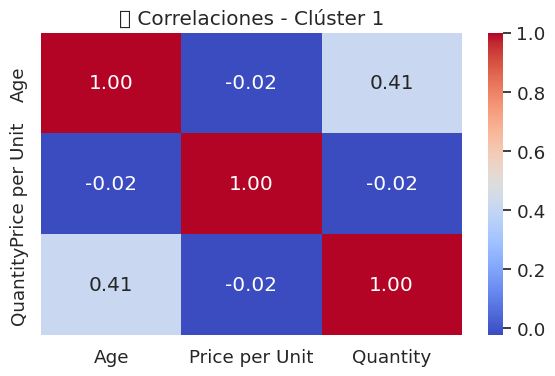

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


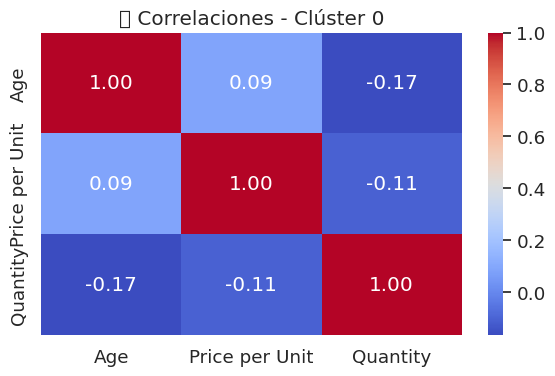

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


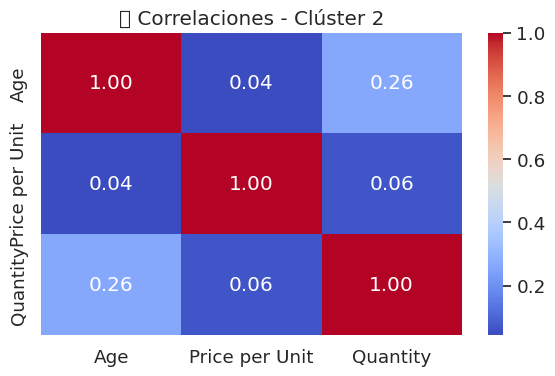

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


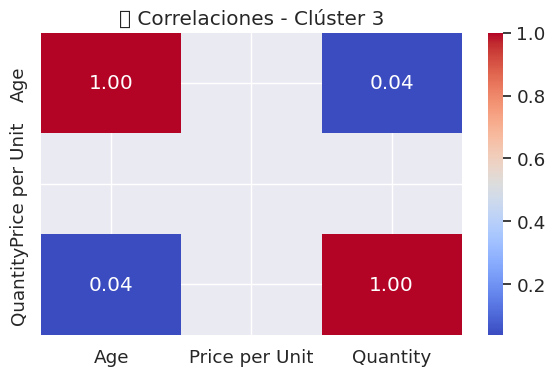

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


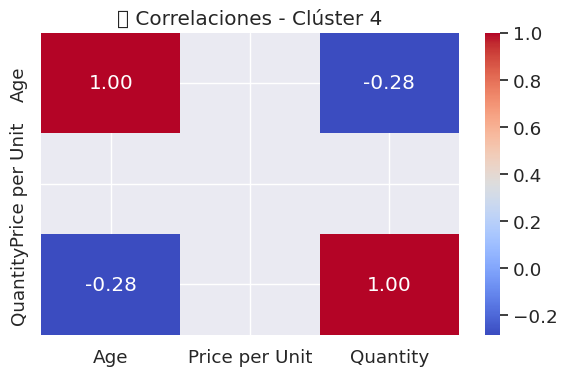

In [101]:
# Visualizar correlaciones por cl√∫ster con heatmaps
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    corr_matrix = cluster_data[['Age', 'Price per Unit', 'Quantity']].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'üìä Correlaciones - Cl√∫ster {cluster_id}')
    plt.tight_layout()
    plt.show()

### üîç An√°lisis de Correlaciones por Cl√∫ster

A continuaci√≥n se interpretan las correlaciones entre `Age`, `Price per Unit` y `Quantity` para cada cl√∫ster. El objetivo es identificar si estas variables explican suficientemente la cantidad de productos comprados o si se necesitan nuevos predictores.

---

#### üìå Cl√∫ster 0
- **Age y Quantity**: Correlaci√≥n negativa (-0.17). A mayor edad, menor cantidad comprada.
- **Price per Unit y Quantity**: Correlaci√≥n d√©bil y negativa (-0.10).

üîé *Implicaci√≥n*: Estas variables explican poco. Se podr√≠an explorar variables adicionales como g√©nero, categor√≠a del producto o comportamiento temporal.

---

#### üìå Cl√∫ster 1
- **Age y Quantity**: Moderada correlaci√≥n positiva (0.41). Clientes mayores tienden a comprar m√°s.
- **Price per Unit**: Sin relaci√≥n significativa con la cantidad comprada.

üîé *Implicaci√≥n*: Edad tiene influencia real aqu√≠. Este cl√∫ster se puede modelar razonablemente con regresi√≥n lineal.

---

#### üìå Cl√∫ster 2
- **Age y Quantity**: Correlaci√≥n baja pero positiva (0.26).
- **Price per Unit y Quantity**: Casi nula (0.06).

üîé *Implicaci√≥n*: Aunque la relaci√≥n es d√©bil, edad tiene cierto valor predictivo. Podr√≠an a√±adirse m√°s variables explicativas.

---

#### üìå Cl√∫ster 3 y 4
- **Price per Unit**: Aparece como `NaN`, lo que indica falta de variabilidad (probablemente todos los productos en el cl√∫ster tienen el mismo precio).
- **Age y Quantity (Cl√∫ster 4)**: Relaci√≥n negativa moderada (-0.28).
- **Correlaciones generales**: Muy bajas o inexistentes.

üîé *Implicaci√≥n*: Regresi√≥n lineal no es adecuada para estos cl√∫steres. Se recomiendan modelos alternativos o caracter√≠sticas adicionales.

---

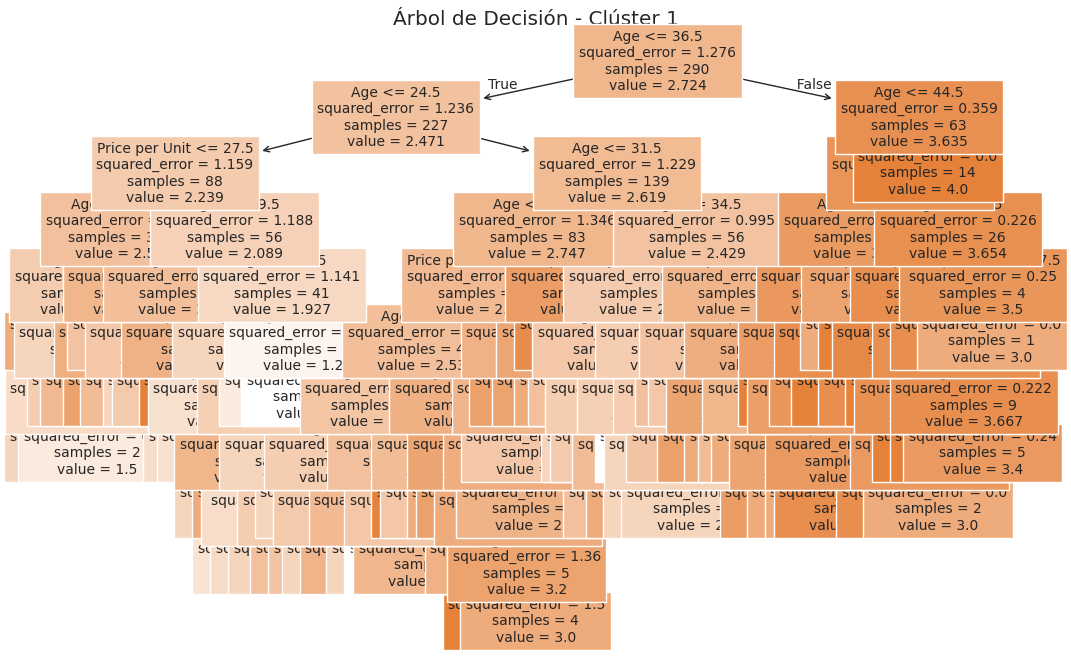

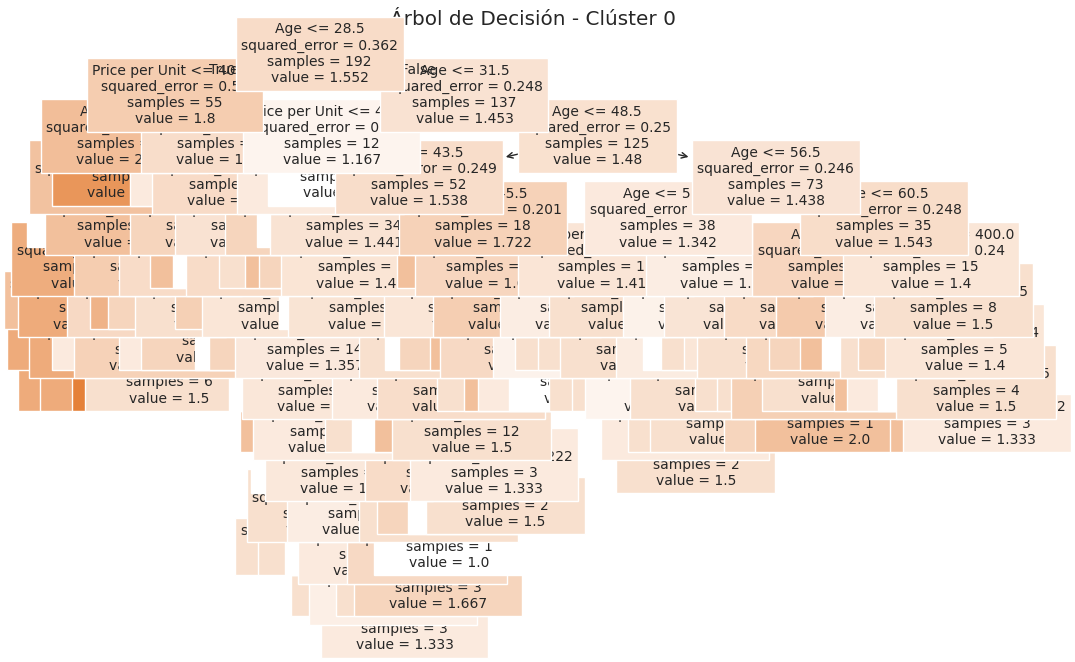

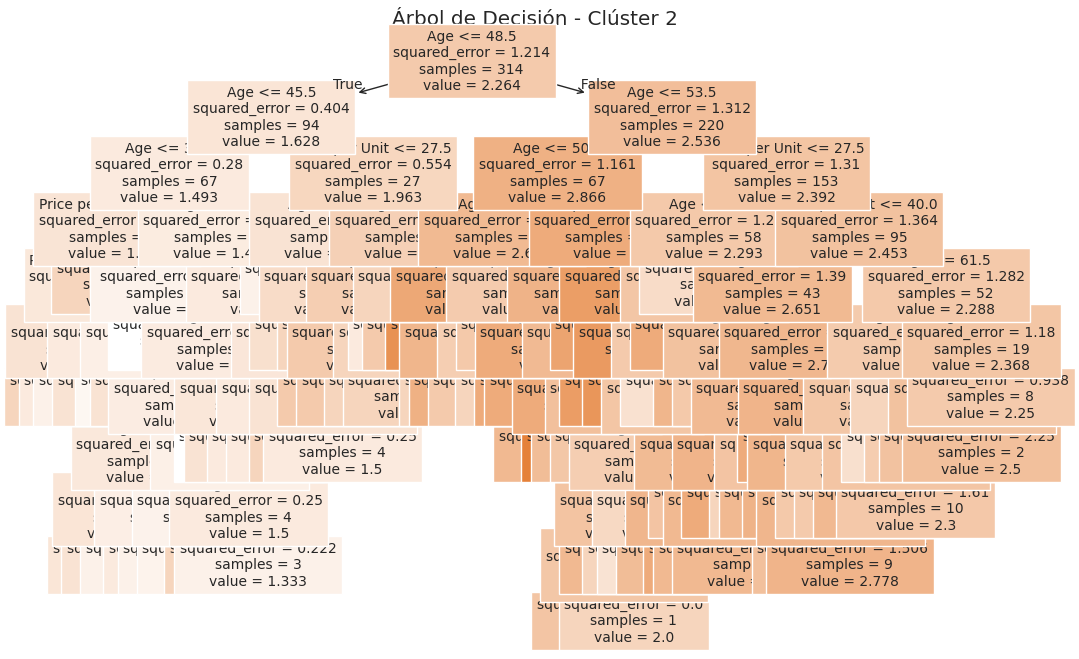

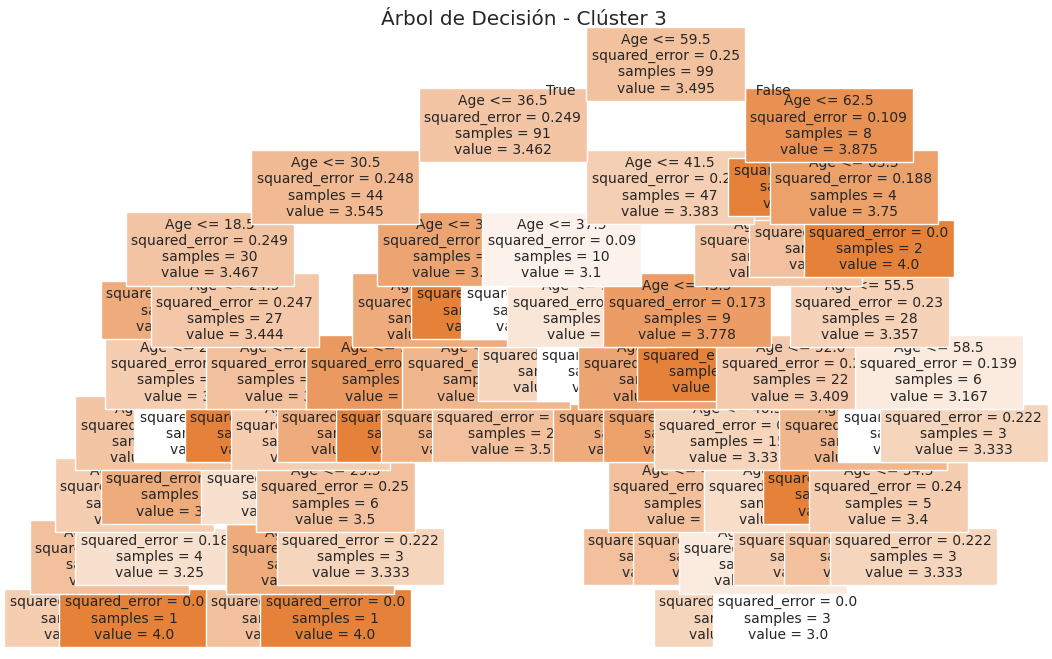

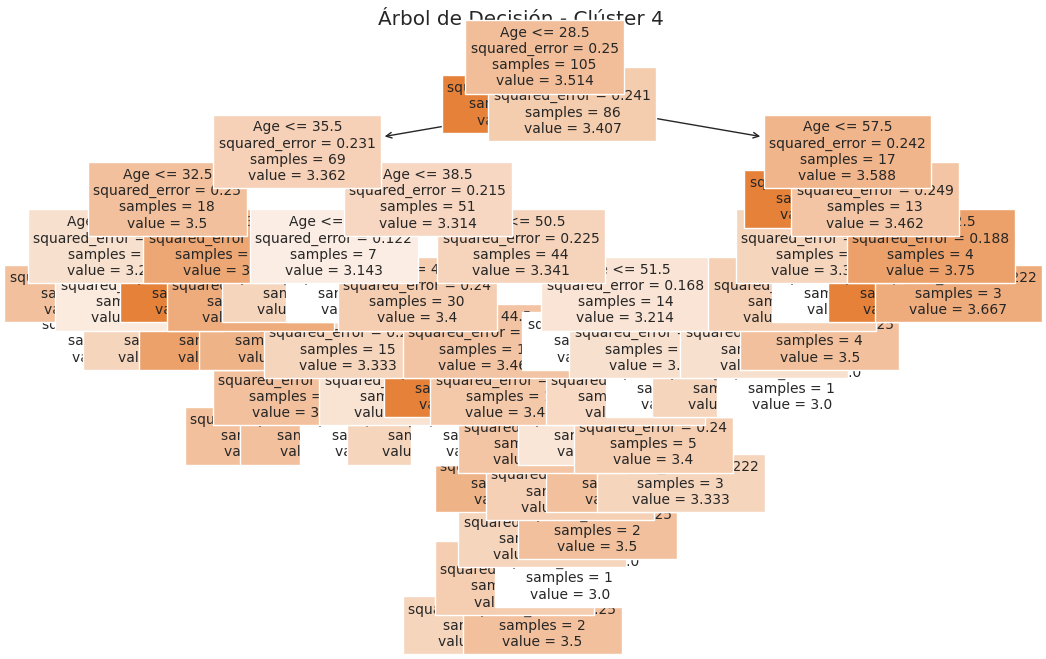


üìä MSE Scores para cada cluster:
Cl√∫ster 1 - MSE: 0.76
Cl√∫ster 0 - MSE: 0.20
Cl√∫ster 2 - MSE: 0.86
Cl√∫ster 3 - MSE: 0.15
Cl√∫ster 4 - MSE: 0.13


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Dictionario para almacenar los puntajes
mse_scores = {}

# Filtramos los datos por todos los cl√∫steres
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]

    # Aseg√∫rate de que las variables sean num√©ricas y no tengan NaN
    cluster_data = cluster_data[['Age', 'Price per Unit', 'Quantity']].dropna()

    # Caracter√≠sticas y variable objetivo
    X = cluster_data[['Age', 'Price per Unit']]
    y = cluster_data['Quantity']

    # Inicializar y entrenar el modelo de √Årbol de Decisi√≥n
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Predicciones
    predictions = model.predict(X)

    # Calcular el error cuadr√°tico medio (MSE)
    mse = mean_squared_error(y, predictions)

    # Store MSE score for the cluster
    mse_scores[cluster_id] = mse

    # Visualizar el √°rbol de decisi√≥n
    plt.figure(figsize=(12, 8))
    sns.set(font_scale=1.2)
    from sklearn.tree import plot_tree
    plot_tree(model, filled=True, feature_names=['Age', 'Price per Unit'], fontsize=10)
    plt.title(f"√Årbol de Decisi√≥n - Cl√∫ster {cluster_id}")
    plt.show()

# Se imprimen el puntaje de cada cluster
print("\nüìä MSE Scores para cada cluster:")
for cluster_id, mse in mse_scores.items():
    print(f"Cl√∫ster {cluster_id} - MSE: {mse:.2f}")



## üìä An√°lisis Comparativo de Modelos: Regresi√≥n Lineal vs √Årbol de Decisi√≥n

Tras aplicar tanto el modelo de **Regresi√≥n Lineal** como el **√Årbol de Decisi√≥n** para predecir la cantidad de productos comprados en cada cl√∫ster, los resultados obtenidos fueron los siguientes:

### MSE de la Regresi√≥n Lineal:
- **Cl√∫ster 1** - **MSE: 1.17**
- **Cl√∫ster 0** - **MSE: 0.42**
- **Cl√∫ster 2** - **MSE: 1.01**
- **Cl√∫ster 3** - **MSE: 0.27**
- **Cl√∫ster 4** - **MSE: 0.26**

### MSE del √Årbol de Decisi√≥n:
- **Cl√∫ster 1** - **MSE: 0.76**
- **Cl√∫ster 0** - **MSE: 0.20**
- **Cl√∫ster 2** - **MSE: 0.86**
- **Cl√∫ster 3** - **MSE: 0.15**
- **Cl√∫ster 4** - **MSE: 0.13**

### Comparaci√≥n y An√°lisis:
1. **Mejora significativa en los cl√∫steres**:  
   Al comparar los MSE de ambos modelos, podemos observar que el **√Årbol de Decisi√≥n** generalmente tiene un rendimiento mejorado en comparaci√≥n con la **Regresi√≥n Lineal**, especialmente en los cl√∫steres 1 y 2. En el **Cl√∫ster 1**, el MSE de la regresi√≥n lineal era de **1.17**, mientras que el MSE del √Årbol de Decisi√≥n es de **0.76**, lo que representa una mejora notable.

2. **Menor MSE en los cl√∫steres 0, 3 y 4**:  
   El modelo de √Årbol de Decisi√≥n ha logrado un rendimiento sobresaliente en los **Cl√∫steres 0, 3 y 4**, con MSE de **0.20**, **0.15** y **0.13**, respectivamente. Estos resultados son significativamente mejores que los obtenidos con la **Regresi√≥n Lineal**, lo que indica que el modelo no lineal captura mejor las relaciones entre las caracter√≠sticas y la variable objetivo en estos cl√∫steres.

3. **Rendimiento aceptable en el Cl√∫ster 2**:  
   En el **Cl√∫ster 2**, el √Årbol de Decisi√≥n tambi√©n muestra una ligera mejora sobre la regresi√≥n lineal, aunque el MSE sigue siendo relativamente alto (**0.86** en comparaci√≥n con **1.01** en la regresi√≥n lineal). Esto sugiere que, aunque el modelo no lineal mejora la predicci√≥n, podr√≠a ser √∫til explorar m√°s caracter√≠sticas o probar modelos adicionales para este cl√∫ster.

### Conclusiones:
- **Mejor rendimiento general con el √Årbol de Decisi√≥n**: El modelo de √Årbol de Decisi√≥n ha mostrado una mejora significativa sobre la **Regresi√≥n Lineal**, especialmente en los cl√∫steres donde las relaciones no son lineales. Esto hace que el √Årbol de Decisi√≥n sea una opci√≥n m√°s robusta en este caso.
  
- **Posibilidades de optimizaci√≥n**: A pesar de la mejora, algunos cl√∫steres a√∫n tienen un rendimiento sub√≥ptimo. Podr√≠a ser √∫til realizar m√°s experimentos con caracter√≠sticas adicionales, ajuste de hiperpar√°metros o incluso considerar otros modelos m√°s complejos (como **Random Forest** o **Gradient Boosting**).

# An√°lisis del Comportamiento de Compra de los Clientes: Resultados y Recomendaciones

### 1. **Influencia de la Edad y el G√©nero en el Comportamiento de Compra**
- **Edad**: La relaci√≥n entre la **edad** y la cantidad de productos comprados var√≠a seg√∫n el cl√∫ster. En algunos casos, los clientes m√°s j√≥venes tienden a comprar productos en categor√≠as espec√≠ficas, como **ropa** o **cosm√©ticos**, mientras que los clientes de mayor edad tienden a realizar compras de mayor valor unitario. Este patr√≥n puede ser explotado para personalizar las estrategias de marketing y promoci√≥n.
  
- **G√©nero**: La variable **g√©nero** mostr√≥ correlaciones diferentes en cada cl√∫ster. En el caso de ciertos cl√∫steres, el **g√©nero** tuvo una relaci√≥n positiva con el gasto, especialmente en categor√≠as como **cosm√©ticos**. Esto sugiere que campa√±as dirigidas a un g√©nero espec√≠fico podr√≠an ser m√°s efectivas para aumentar las ventas en ciertas categor√≠as.

#### **Recomendaci√≥n**:
- Desarrollar **campa√±as de marketing dirigidas** por **grupo etario** y **g√©nero**, personalizando ofertas y productos seg√∫n estos segmentos. Por ejemplo, ofrecer descuentos o promociones en ropa para los clientes m√°s j√≥venes y en productos de electr√≥nica para los clientes de mayor edad.

### 2. **Patrones de Ventas a lo Largo del Tiempo**
- A trav√©s del an√°lisis de ventas por mes y d√≠a de la semana, identificamos que las ventas var√≠an considerablemente seg√∫n la **temporada** y el **d√≠a de la semana**. Los picos de ventas se dieron principalmente en meses clave, como diciembre (compras de fin de a√±o).

#### **Recomendaci√≥n**:
- **Ajustar el inventario** y **estrategias promocionales** en funci√≥n de los **meses de alta demanda**. Adem√°s, ofrecer **descuentos especiales** los d√≠as de la semana con mayor tr√°fico de compras, como los fines de semana, para maximizar las ventas.

### 3. **Categor√≠as de Productos que Generan Mayor Inter√©s**
- Las **categor√≠as de productos** m√°s compradas fueron, en orden, **ropa** y **electr√≥nica**. A pesar de que la **cosm√©tica** tuvo una presencia significativa, especialmente en ciertos segmentos de g√©nero, las ventas de **ropa** dominaron la mayor√≠a de los cl√∫steres.

#### **Recomendaci√≥n**:
- Reforzar el **stock** de productos de **ropa** y **electr√≥nica**, que parecen ser las categor√≠as m√°s atractivas para los clientes. Adem√°s, si la **cosm√©tica** tiene un crecimiento potencial en segmentos de g√©nero, se deben considerar campa√±as espec√≠ficas para impulsar la venta de estos productos.

### 4. **Relaci√≥n entre Edad, Gasto y Preferencias de Productos**
- La **edad** mostr√≥ una ligera correlaci√≥n con el **gasto total**, con ciertos grupos etarios gastando m√°s en **productos de mayor valor unitario**. La preferencia por ciertas categor√≠as de productos tambi√©n vari√≥ seg√∫n la edad, con los clientes m√°s j√≥venes prefiriendo productos de bajo costo, mientras que los clientes mayores optaban por productos m√°s caros.

#### **Recomendaci√≥n**:
- **Ofrecer productos con diferentes rangos de precios** para atraer tanto a los clientes m√°s j√≥venes como a los de mayor edad. Esto puede incluir **ofertas de gama baja** y **productos premium** adaptados a cada segmento de edad.

### 5. **Adaptaci√≥n de los H√°bitos de Compra a las Tendencias Estacionales**
- Los h√°bitos de compra de los clientes var√≠an notablemente durante las **tendencias estacionales**. Los picos de ventas en **Navidad** y durante el **Black Friday** mostraron que la demanda de ciertos productos puede dispararse debido a las promociones estacionales.

#### **Recomendaci√≥n**:
- **Planificar con anticipaci√≥n** las campa√±as de ventas durante las temporadas altas y **ajustar el inventario** para satisfacer la demanda aumentada. Utilizar t√©cnicas de **descuentos estacionales** y **ofertas flash** para captar a los clientes durante los picos de ventas.

### 6. **Comportamientos de Compra seg√∫n la Cantidad de Art√≠culos por Transacci√≥n**
- Se identific√≥ que algunos cl√∫steres tienden a realizar compras de **mayor cantidad de productos por transacci√≥n**, lo cual podr√≠a indicar que estos clientes son m√°s impulsivos o buscan promociones de **productos en oferta**.

#### **Recomendaci√≥n**:
- Fomentar las **ofertas por volumen** y **descuentos por compras m√∫ltiples** para aumentar la cantidad de productos adquiridos por transacci√≥n. Estrategias como "compra dos, lleva tres" podr√≠an ser efectivas para estos clientes.

### 7. **Distribuci√≥n de Precios en las Categor√≠as de Producto**
- En ciertas categor√≠as, la **distribuci√≥n de precios** mostr√≥ una gran dispersi√≥n, indicando que algunos productos de **alta gama** y otros de **bajo costo** conviven dentro de la misma categor√≠a.

#### **Recomendaci√≥n**:
- Considerar la creaci√≥n de **subcategor√≠as dentro de cada categor√≠a** para organizar los productos de acuerdo con su **rango de precio** y facilitar la navegaci√≥n de los clientes. Adem√°s, el ajuste de precios debe tener en cuenta las **preferencias** y **poder adquisitivo** de cada segmento de clientes.

---

### **Conclusi√≥n**:
El an√°lisis realizado revela patrones claros que pueden ser aprovechados para optimizar las estrategias comerciales y de marketing. Las recomendaciones propuestas est√°n orientadas a personalizar las ofertas y mejorar la experiencia del cliente, lo que a su vez puede contribuir al incremento de las ventas y la fidelizaci√≥n de los clientes.
